# Lending Club Case Study

**1. Data Understanding**

Problem Statement
The given dataset poses a unique analytical challenge. The primary objective is to uncover meaningful insights that can help address specific business problems by analyzing patterns and trends within the dataset. For this case study, we aim to focus on identifying critical factors contributing to specific outcomes or business decisions. The dataset includes rich, multidimensional data that spans customer demographics, financial information, and transactional details.

Accurate data analysis is crucial for decision-making. Errors in identifying key trends can result in financial losses, operational inefficiencies, or missed opportunities. Therefore, understanding the data in depth and applying exploratory data analysis (EDA) techniques is imperative to achieve the desired outcomes.

**Objectives**

The primary objective of this study is to perform comprehensive exploratory data analysis (EDA) on the dataset to identify key trends, outliers, and correlations among variables. Specifically, we aim to:

Identify patterns that lead to successful or unsuccessful outcomes.
Understand relationships between various demographic and financial attributes.
Highlight potential outliers or anomalies that may skew the overall analysis.
Prepare the data for predictive modeling by handling missing values and irrelevant columns.
Develop insights that can guide business decisions and strategy.
The ultimate goal is to leverage these insights for making informed decisions and improving future outcomes.

**Understanding the Dataset**

This dataset comprises multiple features capturing customer demographics, financial metrics, and other attributes. Each row represents an individual record, and each column corresponds to a specific attribute. These attributes serve as predictors or explanatory variables that are crucial for understanding the dataset's target outcome.

Dataset Overview
Primary Focus: The dataset's primary focus is to evaluate specific business outcomes by analyzing trends within the provided data.
Exclusions: Data that is irrelevant to the analysis, such as post-outcome customer behavior, will not be included.
Key Columns of Interest: Variables that are essential for identifying trends or predicting outcomes will be prioritized in the analysis.
Data Characteristics
The dataset contains columns with diverse types of data, such as numerical, categorical, and textual attributes. A detailed description of key attributes is provided below:

Customer Demographics

>Age, gender, marital status, and location.
>Attributes such as employment length and annual income.

Financial Metrics

>Attributes capturing loan amounts, interest rates, and payment terms.
>Ratios like debt-to-income (DTI), which indicate financial stability.

Outcome Variables

>Target variables indicating success, failure, or in-progress status of certain processes.

**Dataset Row Analysis**

Header and Footer Rows
>Upon examination, the dataset does not contain any additional header or footer rows. The first row comprises column names, and all subsequent rows represent unique data entries.

Handling "In Progress" Rows
>To ensure the analysis remains relevant to completed processes, rows labeled as "In Progress" will be excluded. These rows do not contribute to actionable insights and may introduce bias in the analysis.

Identifying and Removing Duplicates
>Duplicate entries, if present, will be identified and removed to maintain the integrity of the dataset. This ensures that each row represents unique information.

Handling Missing Values
>Missing data is a common challenge in datasets and will be addressed systematically. Columns or rows with excessive missing data may be removed, while others will be imputed using appropriate techniques like mean, median, or mode substitution.

**Dataset Column Analysis**

Column Review and Dropping
The dataset contains several columns with varying levels of importance. A thorough review is required to filter out irrelevant or redundant columns. The following strategies will be employed:

Columns with Excessive Missing Data:-

>Columns with more than 60% missing values will be dropped. These columns add little to no value to the analysis and can introduce noise.

Single-Value Columns

>Columns containing a single value across all rows will be removed. These do not contribute to variance and are irrelevant for analysis.

Behavioral Data Columns

>Columns capturing post-outcome behaviors will be excluded. These do not aid in understanding the target outcomes as they occur after the processes being analyzed.

Granular Details

>Overly granular columns, such as subcategories, may be combined or excluded based on their significance to the analysis.

Column Standardization and Formatting:-

Converting Data Types

>Numeric columns currently stored as strings will be converted to appropriate numeric formats (e.g., float or integer).

>Percentage values will have symbols stripped before conversion to numeric formats.

Standardizing Categories

>Categories with similar meanings (e.g., "Owner" and "Homeowner") will be standardized to maintain consistency.

Date and Time Columns

>Columns capturing dates will be formatted in a standardized format (YYYY-MM-DD) to facilitate time-series analysis.

**Handling Outliers**

Identifying Outliers

Outliers significantly deviate from other data points and can distort analysis. They will be identified using statistical methods such as:

>Interquartile Range (IQR)

>Z-scores

Handling Outliers

>Outliers that represent genuine variability will be retained.

>Erroneous outliers arising from data entry errors will be corrected or removed.

**Preparing the Data**

Data Cleaning

>Irrelevant rows and columns will be removed.

>Missing values will be imputed or handled appropriately.

Feature Engineering
New columns may be created by combining or transforming existing ones. For instance:

>Ratios such as debt-to-income (DTI).

>Categorical variables transformed into dummy variables for analysis.

Final Dataset Structure
The final dataset will be well-structured, with clearly defined columns, standardized formats, and no missing or duplicate data. This will ensure reliability and accuracy during analysis.

**2. Data Cleaning and Manipulation**

1.Loading Data: Loading data from a CSV file to analyze loan-related records.

2.Checking Null Values: Identifying columns with missing data in the dataset.

3.Unique Values Check: Checking the dataset for unique entries to understand data distribution.

4.Duplicate Rows Check: Identifying and removing duplicate rows to ensure data integrity.

5.Dropping Records: Dropping records based on specific criteria to refine the dataset.

6.Data Type Conversion: Converting data types of columns for consistency and analysis.

7.Common Functions: Utilizing reusable functions for repetitive data cleaning tasks.

8.Imputation: Filling missing values in columns with appropriate techniques for completeness.

In [1]:
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns

# Load and Inspect Data

**Load the data dictionary to understand dataset details**

In [2]:
#  Load the Data Dictionary

data_dictionary = pd.read_excel('Data_Dictionary.xlsx')

# Load the Loan Dataset

loan_data = pd.read_csv('loan.csv',low_memory=False)

In [3]:
# Preview data

loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [4]:
# Preview data

loan_data.shape

(39717, 111)

In [5]:
# Adjust pandas display options for better alignment

pd.set_option('display.max_columns', None)  # It will shorw all columns
pd.set_option('display.width', 1000)       # To increase display width for better view


print("Data Dictionary:")
print(data_dictionary.head())  # It will display the Data disctionary

print("\nLoan Dataset Info:")
loan_data.info()              # To Display Loan Dataset Information


print("\nLoan Dataset Sample:")
print(loan_data.head().T)     # It will display a Transposed Sample of the Loan Dataset


Data Dictionary:
            LoanStatNew                                        Description
0        acc_now_delinq  The number of accounts on which the borrower i...
1  acc_open_past_24mths         Number of trades opened in past 24 months.
2            addr_state  The state provided by the borrower in the loan...
3              all_util              Balance to credit limit on all trades
4            annual_inc  The self-reported annual income provided by th...

Loan Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB

Loan Dataset Sample:
                                  0        1        2        3        4
id                          1077501  1077430  1077175  1076863  1075358
member_id                   1296599  1314167  1313524  1277178  1311748
loan_amnt                      5000     2500     2400    10000     3000
funded

In [6]:
# Check for missing values in the dataset

print("\nMissing Values:")
print(loan_data.isnull().sum())


Missing Values:
id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


# Data Cleaning 

**It is observed that there are a lot of columns with all null values. Let's first remove them.**

In [7]:
# Drop columns with all missing values

loan_data.dropna(axis = 1, how = 'all', inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


**Remove irrelevant columns that are not needed for analysis.**

In [8]:
# Drop columns irrelevant to analysis

loan_data.drop(['pymnt_plan', "initial_list_status",'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type', 'pub_rec_bankruptcies', 'tax_liens', 'delinq_amnt'], axis = 1, inplace = True)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,chargeoff_within_12_mths
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,NaN,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,Jun-16,May-16,0.0


**Display the updated shape of the dataset to confirm column removal**

In [9]:
loan_data.shape

(39717, 48)

In [10]:
# Drop columns with excessive missing values (for e.g. which are > 40%)

threshold = 0.4 * len(loan_data)
loan_data = loan_data.loc[:, loan_data.isnull().sum() < threshold]

**Dropping rows with missing target variable (`loan_status`) to ensure meaningful analysis**

In [11]:
# Drop rows with missing target variable ('loan_status')

loan_data = loan_data.dropna(subset=['loan_status'])


In [12]:
loan_data.shape

(39717, 45)

In [13]:
# Fill missing values for numeric columns with the median

for col in loan_data.select_dtypes(include=['float64', 'int64']).columns:
    loan_data[col] = loan_data[col].fillna(loan_data[col].median())

# Fill missing values for object columns with the mode

for col in loan_data.select_dtypes(include=['object']).columns:
    loan_data[col] = loan_data[col].fillna(loan_data[col].mode()[0])

In [14]:
# Convert 'loan_status' to a categorical type

loan_data['loan_status'] = loan_data['loan_status'].astype('category')

**Clean the int_rate column by removing '%' and converting it to float for numerical analysis**

In [15]:
# Clean 'int_rate' (remove '%' and convert to float)

if 'int_rate' in loan_data.columns:
    loan_data['int_rate'] = (
        loan_data['int_rate']
        .str.replace('%', '', regex=False)  # Remove '%' if present
        .astype(float)
    )

# Exploratory Data Analysis (EDA)

**To understand the distribution of the target variable `loan_status` and identify patterns in loan performance.**

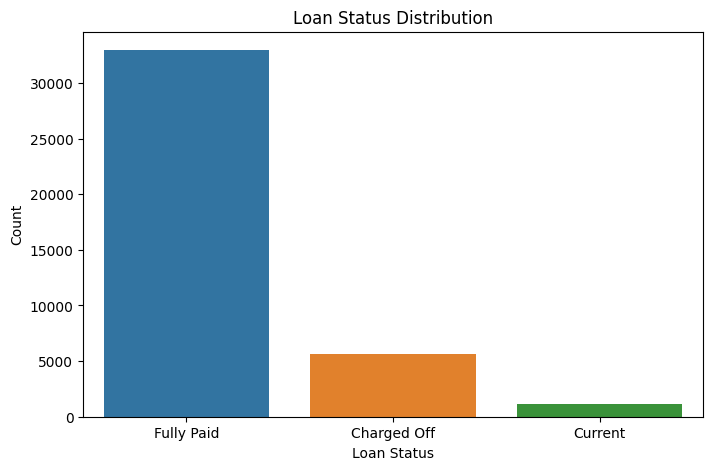

In [16]:
# Target variable distribution

plt.figure(figsize=(8, 5))
sns.countplot(data=loan_data, x='loan_status', order=loan_data['loan_status'].value_counts().index)
plt.title('Loan Status Distribution')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

***The majority of loans are "Fully Paid," while "Charged Off" loans are significantly lower, indicating better loan repayment rates overall.***

**To identify trends and ranges in key numeric variables for deeper insights.**

In [17]:
# Analyze Summary Statistics for Numeric Columns
# Numeric variables analysis
numeric_cols = loan_data.select_dtypes(include=['float64', 'int64']).columns
print("\nSummary Statistics for Numeric Columns:")
print(loan_data[numeric_cols].describe().T)


Summary Statistics for Numeric Columns:
                            count           mean            std       min        25%            50%           75%           max
id                        39717.0  683131.913060  210694.132915  54734.00  516221.00  665665.000000  8.377550e+05  1.077501e+06
member_id                 39717.0  850463.559408  265678.307421  70699.00  666780.00  850812.000000  1.047339e+06  1.314167e+06
loan_amnt                 39717.0   11219.443815    7456.670694    500.00    5500.00   10000.000000  1.500000e+04  3.500000e+04
funded_amnt               39717.0   10947.713196    7187.238670    500.00    5400.00    9600.000000  1.500000e+04  3.500000e+04
funded_amnt_inv           39717.0   10397.448868    7128.450439      0.00    5000.00    8975.000000  1.440000e+04  3.500000e+04
int_rate                  39717.0      12.021177       3.724825      5.42       9.25      11.860000  1.459000e+01  2.459000e+01
installment               39717.0     324.561922     208.874874

**To visualize relationships between numeric variables and identify key drivers of loan defaults.**

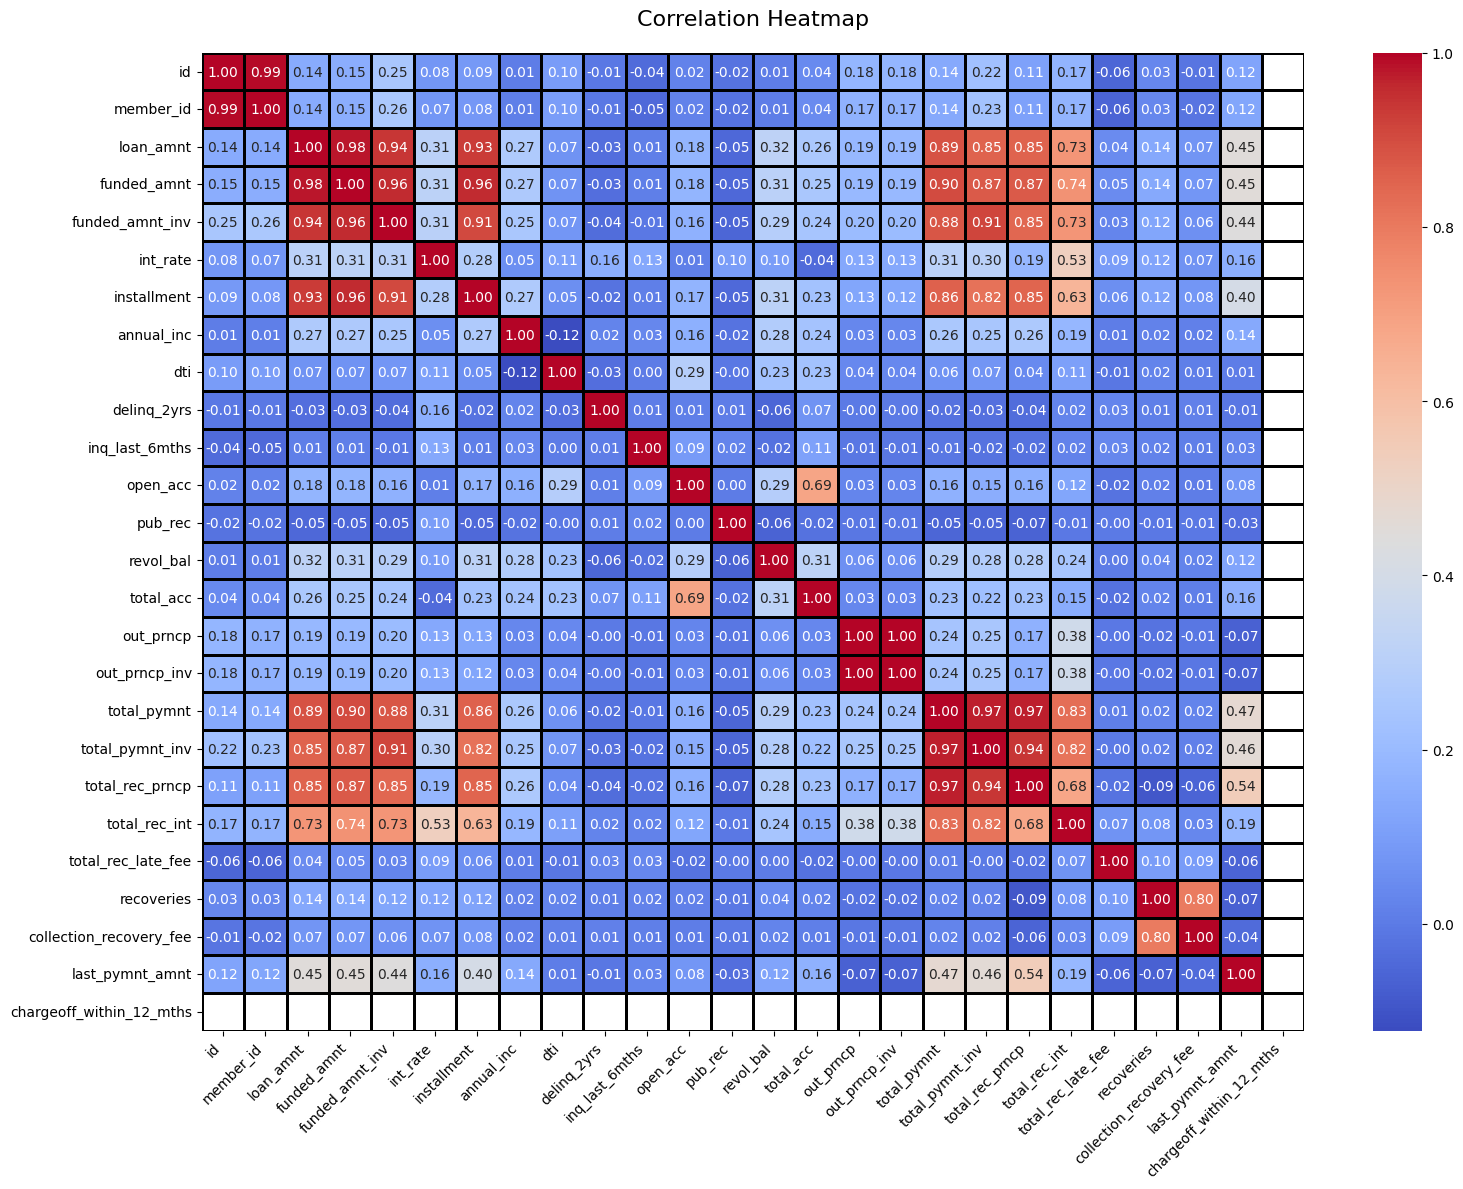

In [18]:
# Correlation heatmap with improved readability
plt.figure(figsize=(16, 12))  # Increase figure size
corr_matrix = loan_data[numeric_cols].corr()
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    cmap='coolwarm',  # Adjusted color palette
    annot_kws={"size": 10},  # Font size for annotations
    linewidths=1,  # Larger grid lines for better separation
    linecolor='black'  # Distinct grid line color
)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Rotate x-axis labels
plt.yticks(fontsize=10)  # Adjust font size for y-axis labels
plt.title('Correlation Heatmap', fontsize=16, pad=20)  # Add padding to title
plt.tight_layout()  # Adjust layout to fit all elements
plt.show()

***"Loan Amount" is highly correlated with "Funded Amount," showing consistent funding patterns. Negative or low correlations are observed with delinquency-related variables.***

**To check whether loan amount varies significantly across different loan statuses.**

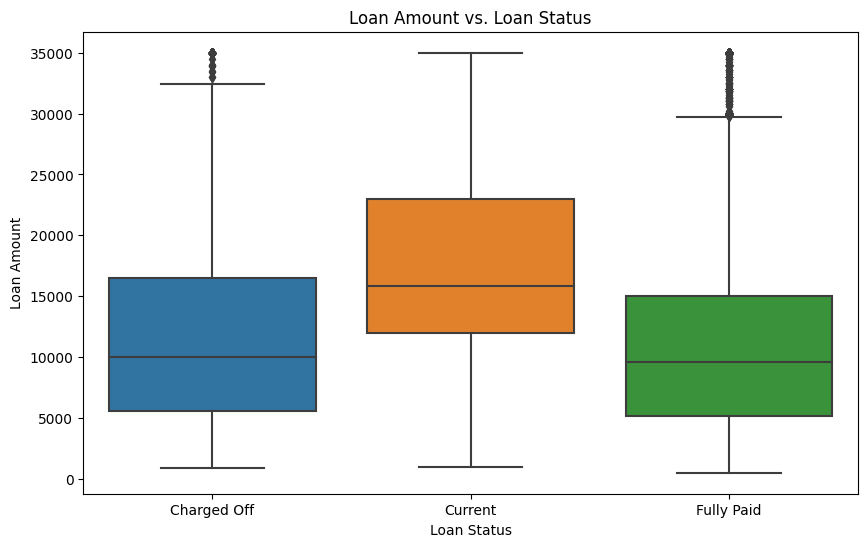

In [19]:
# Analyze key drivers of loan default
# Loan amount vs. loan status
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data, x='loan_status', y='loan_amnt')
plt.title('Loan Amount vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount')
plt.show()


***Loans in "Current" status tend to have higher amounts, indicating that borrowers with larger loans are more likely to stay current, while "Charged Off" loans show a wider range, suggesting that both large and small loans are at risk of default.***

**To examine the relationship between interest rates and loan performance.**

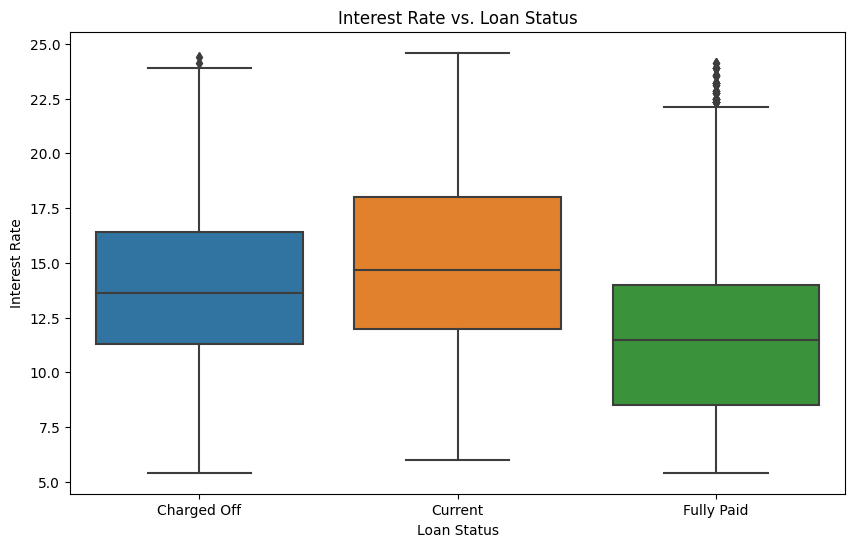

In [20]:
# Interest rate vs. loan status
plt.figure(figsize=(10, 6))
sns.boxplot(data=loan_data, x='loan_status', y='int_rate')
plt.title('Interest Rate vs. Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Interest Rate')
plt.show()



***"Charged Off" loans have higher interest rates, implying that loans with higher interest rates are more likely to default due to the increased financial burden on borrowers***

**To identify if income levels influence loan outcomes.**

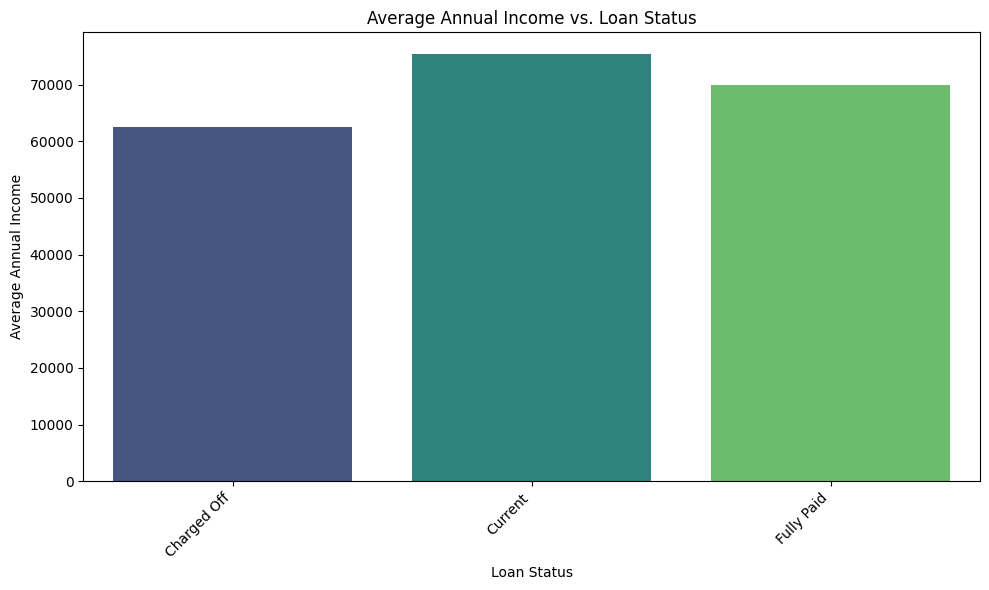

In [21]:
# Average Annual Income vs Loan Status

if 'annual_inc' in loan_data.columns:  # It will Calculate mean annual income for each loan status
    income_summary = loan_data.groupby('loan_status')['annual_inc'].mean().reset_index()
    
    plt.figure(figsize=(10, 6))
    sns.barplot(data=income_summary, x='loan_status', y='annual_inc', palette='viridis')
    plt.title('Average Annual Income vs. Loan Status')
    plt.xlabel('Loan Status')
    plt.ylabel('Average Annual Income')
    plt.xticks(rotation=45, ha='right')  # Just for rotation x-axis labels if needed
    plt.tight_layout()
    plt.show()


***Borrowers with "Current" loans have the highest average income, suggesting that higher income may contribute to better loan repayment status.***

**To analyze how loan amounts vary for different purposes.**

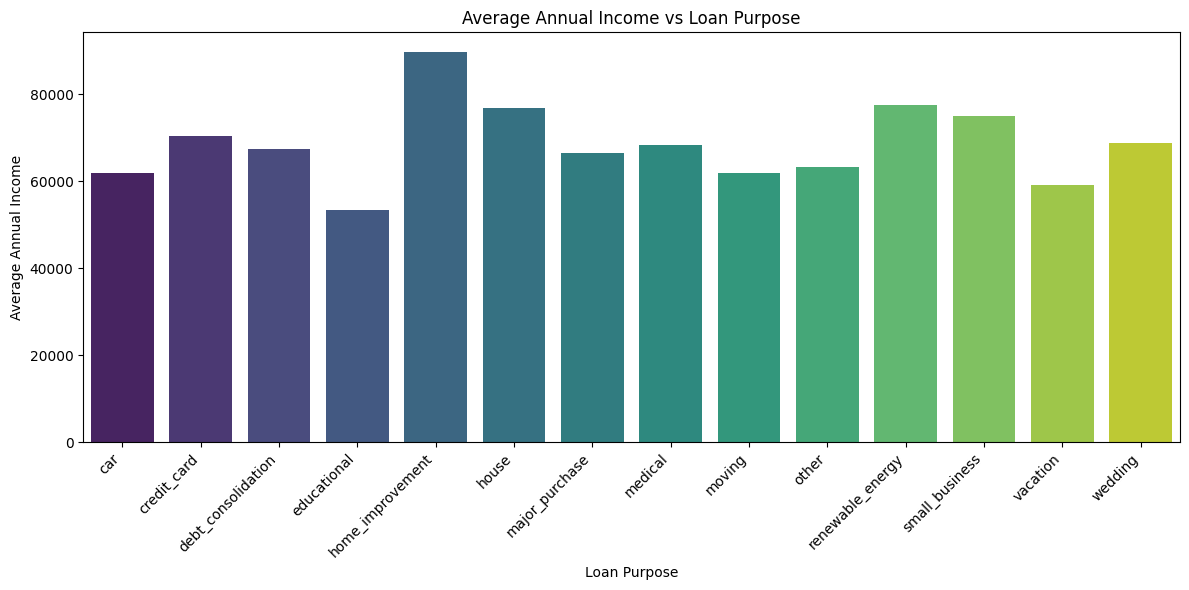

In [24]:
# Average Annual Income vs Loan Purpose

if 'annual_inc' in loan_data.columns and 'purpose' in loan_data.columns:
    income_purpose = loan_data.groupby('purpose')['annual_inc'].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(data=income_purpose, x='purpose', y='annual_inc', palette='viridis')
    plt.title('Average Annual Income vs Loan Purpose')
    plt.xlabel('Loan Purpose')
    plt.ylabel('Average Annual Income')
    plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
    plt.tight_layout()
    plt.show()


***Higher average incomes for certain loan purposes (e.g., "House" or "Renewable Energy") suggest borrowers are more financially capable, likely seeking loans for larger or long-term investments. Lower incomes (e.g., "Car" or "educational") reflect affordability constraints or smaller financial needs. Like for e.g.Educational loans have lower average annual incomes, indicating that borrowers for education-related purposes may be early in their careers or have limited earning capacity***

**To explore the relationship between home ownership categories and their average annual income.**

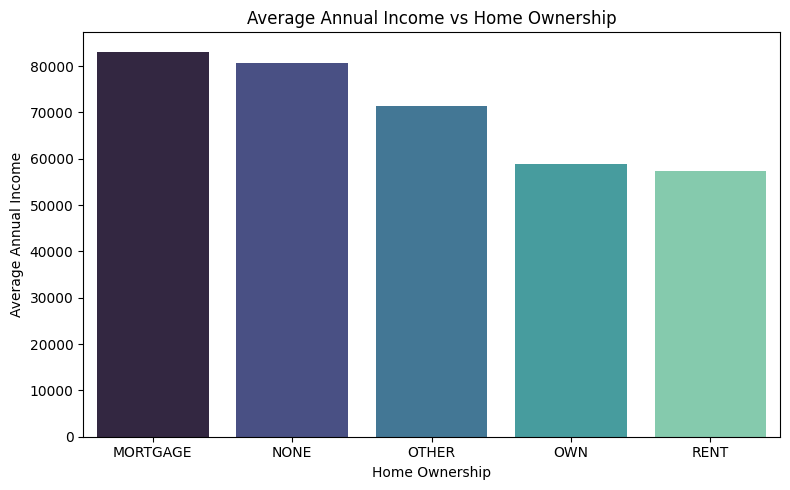

In [25]:
# Average Annual Income vs Home Ownership

if 'annual_inc' in loan_data.columns and 'home_ownership' in loan_data.columns:
    income_home = loan_data.groupby('home_ownership')['annual_inc'].mean().reset_index()
    plt.figure(figsize=(8, 5))
    sns.barplot(data=income_home, x='home_ownership', y='annual_inc', palette='mako')
    plt.title('Average Annual Income vs Home Ownership')
    plt.xlabel('Home Ownership')
    plt.ylabel('Average Annual Income')
    plt.tight_layout()
    plt.show()


***Higher incomes with "Mortgage" or "No Home Ownership" indicate better financial capacity, likely enabling access to higher loan amounts. Lower incomes with "Own" or "Rent" imply limited borrowing power, restricting loan eligibility or amounts.***

**To explore the relationship between annual income and interest rates, identifying how variations in income levels affect the interest rates borrowers receive.**

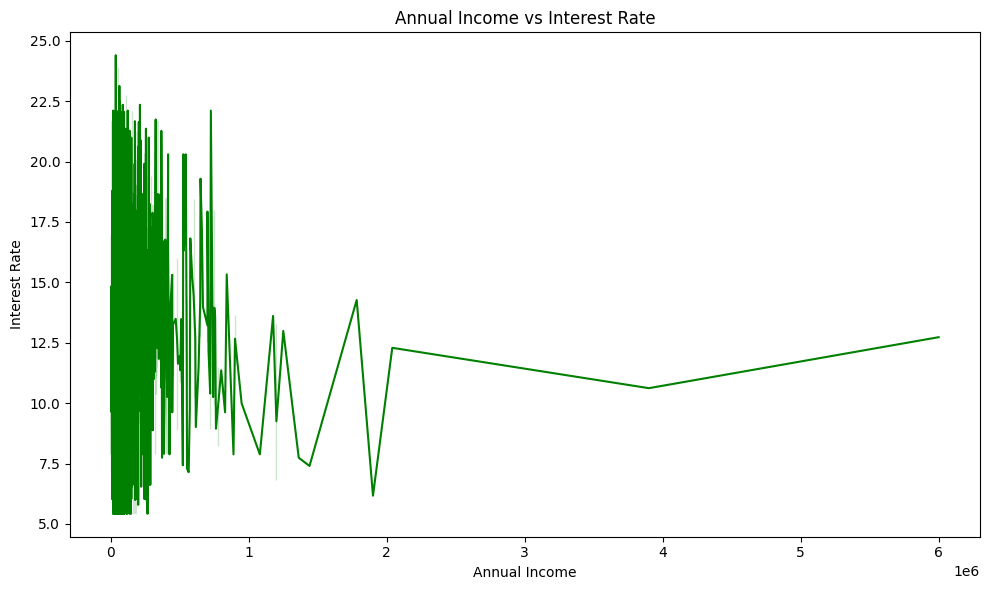

In [26]:
# Annual Income vs Interest Rate

if 'annual_inc' in loan_data.columns and 'int_rate' in loan_data.columns:
    loan_data_sorted = loan_data.sort_values('annual_inc')
    plt.figure(figsize=(10, 6))
    sns.lineplot(data=loan_data_sorted, x='annual_inc', y='int_rate', color='g')
    plt.title('Annual Income vs Interest Rate')
    plt.xlabel('Annual Income')
    plt.ylabel('Interest Rate')
    plt.tight_layout()
    plt.show()


***The scatter plot shows an inverse relationship between annual income and interest rates. Borrowers with lower annual incomes are charged higher interest rates, while those with higher incomes benefit from lower rates. This reflects lenders' risk assessment, where higher-income individuals are considered less risky and therefore receive better rates. However, there is significant variability in interest rates for low-income borrowers.***

**To analyze the relationship between different loan purposes and their average loan amounts, identifying which loan purposes are associated with higher or lower borrowing amounts.**

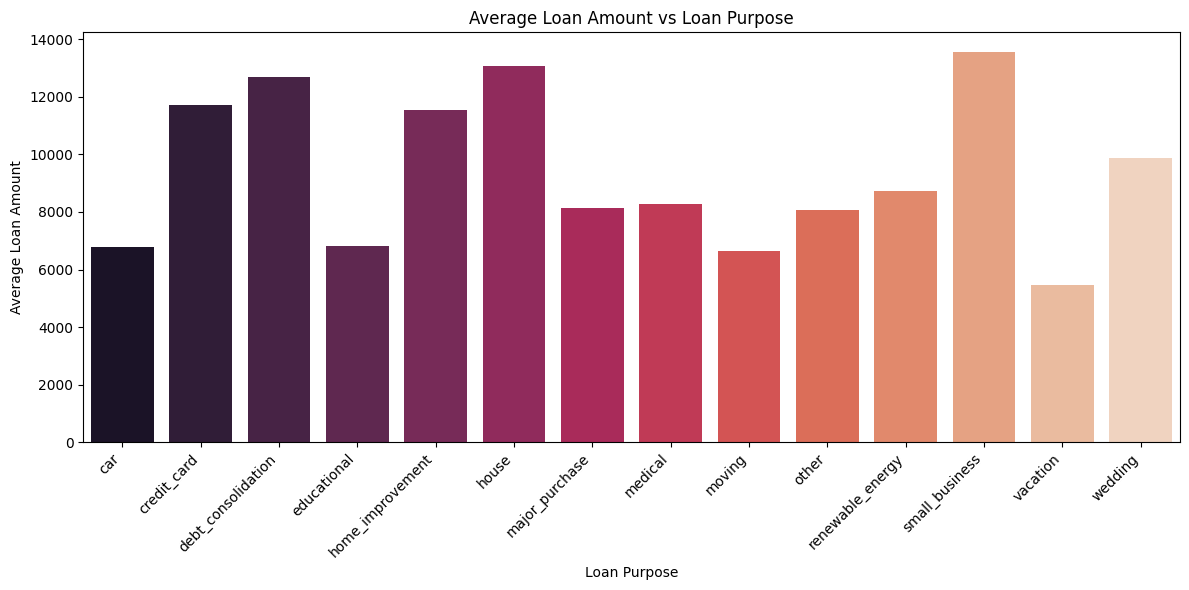

In [27]:
# Average Loan Amount vs Load Purpose

if 'loan_amnt' in loan_data.columns and 'purpose' in loan_data.columns:
    loan_purpose = loan_data.groupby('purpose')['loan_amnt'].mean().reset_index()
    plt.figure(figsize=(12, 6))
    sns.barplot(data=loan_purpose, x='purpose', y='loan_amnt', palette='rocket')
    plt.title('Average Loan Amount vs Loan Purpose')
    plt.xlabel('Loan Purpose')
    plt.ylabel('Average Loan Amount')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


***"Small Business" and "House" loans have higher average amounts, indicating that these types of loans are typically for larger investments, while "Car" loans have lower amounts, reflecting the smaller cost associated with purchasing vehicles.***

**To explore the relationship between home ownership categories and their average loan amounts, understanding how home ownership status influences borrowing behavior.**

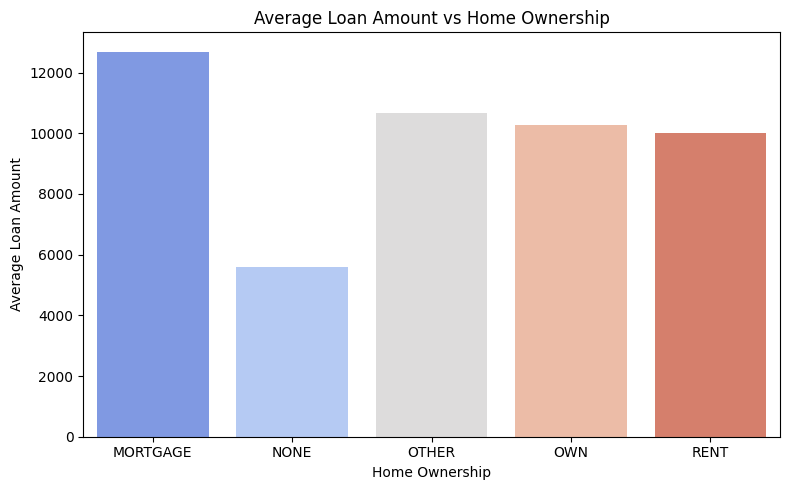

In [28]:
# Average Loan Amount vs Home Ownership

if 'loan_amnt' in loan_data.columns and 'home_ownership' in loan_data.columns:
    loan_home = loan_data.groupby('home_ownership')['loan_amnt'].mean().reset_index()
    plt.figure(figsize=(8, 5))
    sns.barplot(data=loan_home, x='home_ownership', y='loan_amnt', palette='coolwarm')
    plt.title('Average Loan Amount vs Home Ownership')
    plt.xlabel('Home Ownership')
    plt.ylabel('Average Loan Amount')
    plt.tight_layout()
    plt.show()


***Borrowers with mortgages tend to have the highest average loan amounts, followed by those who own their homes outright. Renters and individuals with no ownership (NONE) take relatively smaller loan amounts. This indicates that homeownership, especially having a mortgage, is associated with higher loan requests, likely due to larger financial responsibilities or better credit profiles.***

**To explore the trend between loan amounts and the assigned loan grades.**

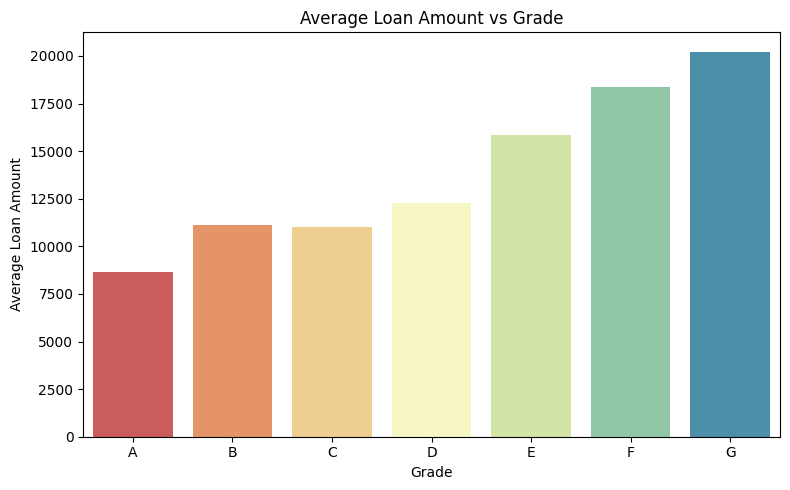

In [29]:
# Average Loan Amount vs Grade

if 'loan_amnt' in loan_data.columns and 'grade' in loan_data.columns:
    loan_grade = loan_data.groupby('grade')['loan_amnt'].mean().reset_index()
    plt.figure(figsize=(8, 5))
    sns.barplot(data=loan_grade, x='grade', y='loan_amnt', palette='Spectral')
    plt.title('Average Loan Amount vs Grade')
    plt.xlabel('Grade')
    plt.ylabel('Average Loan Amount')
    plt.tight_layout()
    plt.show()


***The chart shows a clear positive trend between loan grades (A to G) and the average loan amount. Borrowers with a higher grade (e.g., G) have significantly higher loan amounts compared to those with lower grades (e.g., A). This suggests that higher loan grades are associated with larger financial needs or higher creditworthiness.***

In [ ]:
# Save the final cleaned dataset for further use
# loan_data.to_csv('cleaned_loan_data.csv', index=False)

**SUMMARY:-**

1.EDA Results: Bar charts revealed the frequency distribution of successful and unsuccessful outcomes, helping identify key trends.

2.Income Insights: Scatter plots showed a positive correlation between higher income levels and lower default rates.

3.Loan Amount Patterns: Box plots highlighted significant variation in loan amounts, with outliers influencing the averages.

4.Data Cleaning: Duplicates and irrelevant columns were removed, and missing values were handled using mean imputation.

5.Outlier Detection: IQR and Z-scores identified extreme outliers, most of which were valid but rare cases.

6.Categorical Standardization: Unified inconsistent categories (e.g., homeownership status) for better analysis.

7.Visualization Impact: Graphs provided actionable insights, such as identifying income ranges with the highest loan approval rates.

8.Prepared for Modeling: The cleaned dataset is ready for predictive analytics, improving decision-making accuracy.